In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from pathlib import Path
path = Path.cwd()
path = str(path)+"/dnevna_popunjenost_hotel0_ARIMA.csv"
df = pd.read_csv(path)
df.head()


,datum,ukupan_broj_gostiju,broj_djece_gostiju,broj_odraslih_gostiju
0,2015-07-01,67,2,65
1,2015-07-02,128,4,124
2,2015-07-03,165,5,160
3,2015-07-04,227,12,215
4,2015-07-05,253,15,238


In [55]:
df['datum']=pd.to_datetime(df['datum'])

In [56]:
df.index = df['datum']

In [57]:
df.head()

,datum,ukupan_broj_gostiju,broj_djece_gostiju,broj_odraslih_gostiju
datum,,,,
2015-07-01,2015-07-01,67,2,65
2015-07-02,2015-07-02,128,4,124
2015-07-03,2015-07-03,165,5,160
2015-07-04,2015-07-04,227,12,215
2015-07-05,2015-07-05,253,15,238


In [58]:
#provjera stacionarnosti vremenske serije koristeći Augmented Dickey-Fuller (ADF) test
result = adfuller(df['ukupan_broj_gostiju'])
# Ispis rezultata
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Interpretacija rezultata
if result[1] < 0.05:
    print("\nSerija je stacionarna.")
else:
    print("\nSerija nije stacionarna i treba je diferencirati")
#pocetna hipoteza je da serija nije stacionarna. ADF statistika mora biti manja od kriticnih vrijednosti kako bi mogli
#odbaciti pocetnu hipotezu sa 99%, 95% ili 90% sigurnosti
#posto je ADF statistika veca od krtiicnih vrijednosti ne mozemo odbaciti hipotezu i moramo diferencirati podatke

ADF Statistic: -1.8062698079004698
p-value: 0.3773533810095373
Critical Values:
   1%: -3.4388599939707056
   5%: -2.865295977855759
   10%: -2.5687700561872413

Serija nije stacionarna i treba je diferencirati


In [59]:
#diferenciranje podataka
df['diferencirano_ukupno'] = df['ukupan_broj_gostiju'].diff()
path = Path.cwd()
path = str(path)+"/diferencirano_hotel0.csv"
df.to_csv(path, index=False)
df_dif = pd.read_csv(path)

In [60]:
df_dif.head()

,datum,ukupan_broj_gostiju,broj_djece_gostiju,broj_odraslih_gostiju,diferencirano_ukupno
0,2015-07-01,67,2,65,NaN
1,2015-07-02,128,4,124,61.0
2,2015-07-03,165,5,160,37.0
3,2015-07-04,227,12,215,62.0
4,2015-07-05,253,15,238,26.0


In [61]:
df_dif = df_dif.dropna()
df_dif.head()

,datum,ukupan_broj_gostiju,broj_djece_gostiju,broj_odraslih_gostiju,diferencirano_ukupno
1,2015-07-02,128,4,124,61.0
2,2015-07-03,165,5,160,37.0
3,2015-07-04,227,12,215,62.0
4,2015-07-05,253,15,238,26.0
5,2015-07-06,302,21,281,49.0


In [62]:
#ADF test za broj odraslih
result_odrasli = adfuller(df['broj_odraslih_gostiju'])
print('ADF Statistic:', result_odrasli[0])
print('p-value:', result_odrasli[1])
print('Critical Values:')
for key, value in result_odrasli[4].items():
    print(f'   {key}: {value}')

# Interpretacija rezultata
if result_odrasli[1] < 0.05:
    print("\nSerija je stacionarna.")
else:
    print("\nSerija nije stacionarna i treba je diferencirati")

ADF Statistic: -1.8776658393836825
p-value: 0.3426396339444887
Critical Values:
   1%: -3.4388599939707056
   5%: -2.865295977855759
   10%: -2.5687700561872413

Serija nije stacionarna i treba je diferencirati


In [63]:
#ponovljeni ADF test na diferenciranim podatcima 
df_dif = df_dif.dropna()
result = adfuller(df_dif['diferencirano_ukupno'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Interpretacija rezultata
if result[1] < 0.05:
    print("\nSerija je stacionarna.")
else:
    print("\nSerija nije stacionarna i treba je diferencirati")

ADF Statistic: -7.879987409589661
p-value: 4.731094097220997e-12
Critical Values:
   1%: -3.4388599939707056
   5%: -2.865295977855759
   10%: -2.5687700561872413

Serija je stacionarna.


In [64]:
#Kreiranje ACF (Autocorrelation Function) i PACF (Partial Autocorrelation Function) grafikona koji nam sluze
#za odredivanje p i q parametara u ARIM-i


<Figure size 1000x600 with 0 Axes>

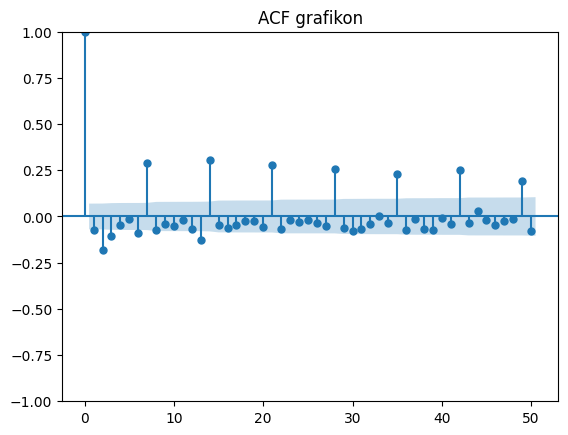

In [65]:
#ACF grafikon
plt.figure(figsize=(10, 6))
plot_acf(df_dif['diferencirano_ukupno'], lags=50)
plt.title('ACF grafikon')
plt.show()

<Figure size 1000x600 with 0 Axes>

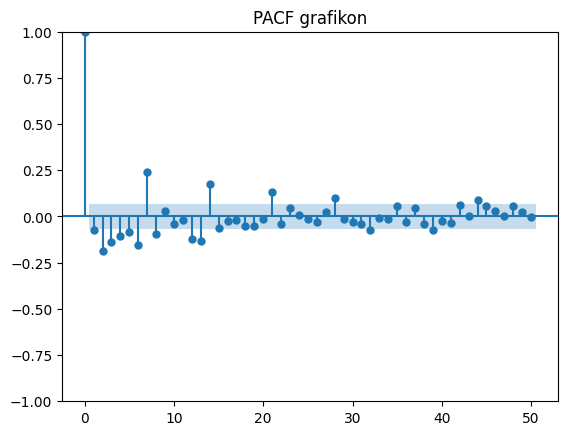

In [66]:
#PACF grafikon
plt.figure(figsize=(10, 6))
plot_pacf(df_dif['diferencirano_ukupno'], lags=50)
plt.title('PACF grafikon')
plt.show()

In [67]:
df_dif.info()

<class 'pandas.core.frame.DataFrame'>
Index: 792 entries, 1 to 792
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   datum                  792 non-null    object 
 1   ukupan_broj_gostiju    792 non-null    int64  
 2   broj_djece_gostiju     792 non-null    int64  
 3   broj_odraslih_gostiju  792 non-null    int64  
 4   diferencirano_ukupno   792 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 37.1+ KB


In [68]:
df_dif['datum'] = pd.to_datetime(df_dif['datum'])

In [69]:
#trazenje najboljih parametara za ARIMU korsitenjem fit funkcije 

from pmdarima import auto_arima
model = auto_arima(df['ukupan_broj_gostiju'], seasonal=False, trace=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7888.562, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7947.317, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7945.272, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7942.582, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7945.412, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7886.848, Time=0.32 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=7897.903, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7894.148, Time=0.21 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=7895.522, Time=0.66 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=7887.323, Time=0.33 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7886.563, Time=0.36 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7918.987, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=7888.561, Time=0.47 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=7905.150, Time=0.34 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  793
Model:               SARIMAX(5, 1, 3)   Log Likelihood               -3914.484
Date:                Tue, 05 Mar 2024   AIC                           7846.968
Time:                        22:52:58   BIC                           7889.039
Sample:                    07-01-2015   HQIC                          7863.137
                         - 08-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0341      0.074      0.459      0.646      -0.111       0.180
ar.L2         -0.8019      0.049    -16.362      0.000      -0.898      -0.706
ar.L3          0.2790      0.092      3.036      0.002       0.099       0.459
ar.L4         -0.1126      0.033     -3.420      0.001      -0.177      -0.048
ar.L5         -0.1757      0.037     -4.726      0.000      -0.248      -0.103
ma.L1         -0.1658      0.076     -2.187      0.029      -0.314      -0.017
ma.L2          0.6361      0.037     17.039      0.000       0.563       0.709
ma.L3         -0.5751      0.067     -8.530      0.000      -0.707      -0.443
sigma2      1191.3166     37.837     31.486      0.000    1117.158    1265.476
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               973.18
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [70]:
print(df.shape)
train = df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape, test.shape)

(793, 5)
(763, 5) (30, 5)


In [71]:
train.describe

<bound method NDFrame.describe of                 datum  ukupan_broj_gostiju  broj_djece_gostiju  \
datum                                                            
2015-07-01 2015-07-01                   67                   2   
2015-07-02 2015-07-02                  128                   4   
2015-07-03 2015-07-03                  165                   5   
2015-07-04 2015-07-04                  227                  12   
2015-07-05 2015-07-05                  253                  15   
...               ...                  ...                 ...   
2017-07-28 2017-07-28                  423                  49   
2017-07-29 2017-07-29                  420                  54   
2017-07-30 2017-07-30                  408                  48   
2017-07-31 2017-07-31                  395                  53   
2017-08-01 2017-08-01                  438                  65   

            broj_odraslih_gostiju  diferencirano_ukupno  
datum                                            

In [72]:
model = ARIMA(train['ukupan_broj_gostiju'], order = (5,1,3))
model = model.fit()
model.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     ukupan_broj_gostiju   No. Observations:                  763
Model:                  ARIMA(5, 1, 3)   Log Likelihood               -3778.692
Date:                 Tue, 05 Mar 2024   AIC                           7575.383
Time:                         22:53:00   BIC                           7617.107
Sample:                     07-01-2015   HQIC                          7591.448
                          - 08-01-2017                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0157      0.087     -0.180      0.857      -0.187       0.155
ar.L2         -0.8478      0.055    -15.511      0.000      -0.955      -0.741
ar.L3          0.2204      0.108      2.041      0.041       0.009       0.432
ar.L4         -0.1371      0.034     -4.032      0.000      -0.204      -0.070
ar.L5         -0.1705      0.039     -4.386      0.000      -0.247      -0.094
ma.L1         -0.1140      0.090     -1.266      0.206      -0.291       0.063
ma.L2          0.6685      0.043     15.502      0.000       0.584       0.753
ma.L3         -0.5253      0.082     -6.409      0.000      -0.686      -0.365
sigma2      1227.3915     40.330     30.433      0.000    1148.345    1306.438
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               895.22
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.52   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
start = len(train)
end = len(train)+len(test)-1
pred = model.predict(start = start, end = end, typ = 'levels')
print(pred)

2017-08-02    430.882518
2017-08-03    427.438280
2017-08-04    428.529072
2017-08-05    426.184379
2017-08-06    418.182393
2017-08-07    422.222127
2017-08-08    428.863852
2017-08-09    423.705987
2017-08-10    420.543138
2017-08-11    427.240305
2017-08-12    427.080454
2017-08-13    420.282464
2017-08-14    423.314025
2017-08-15    428.615830
2017-08-16    423.343904
2017-08-17    420.559133
2017-08-18    426.984662
2017-08-19    426.838955
2017-08-20    420.598453
2017-08-21    423.516995
2017-08-22    428.323816
2017-08-23    423.322751
2017-08-24    420.849638
2017-08-25    426.851966
2017-08-26    426.595506
2017-08-27    420.831504
2017-08-28    423.654267
2017-08-29    428.039071
2017-08-30    423.318209
2017-08-31    421.130941
Freq: D, Name: predicted_mean, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [74]:
pred.head()

2017-08-02    430.882518
2017-08-03    427.438280
2017-08-04    428.529072
2017-08-05    426.184379
2017-08-06    418.182393
Freq: D, Name: predicted_mean, dtype: float64

In [75]:
print(test)

                datum  ukupan_broj_gostiju  broj_djece_gostiju  \
datum                                                            
2017-08-02 2017-08-02                  451                  68   
2017-08-03 2017-08-03                  438                  63   
2017-08-04 2017-08-04                  441                  56   
2017-08-05 2017-08-05                  429                  55   
2017-08-06 2017-08-06                  428                  64   
2017-08-07 2017-08-07                  439                  62   
2017-08-08 2017-08-08                  437                  64   
2017-08-09 2017-08-09                  437                  63   
2017-08-10 2017-08-10                  418                  55   
2017-08-11 2017-08-11                  434                  59   
2017-08-12 2017-08-12                  433                  54   
2017-08-13 2017-08-13                  413                  51   
2017-08-14 2017-08-14                  429                  55   
2017-08-15

In [76]:
test.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2017-08-02 to 2017-08-31
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   datum                  30 non-null     datetime64[ns]
 1   ukupan_broj_gostiju    30 non-null     int64         
 2   broj_djece_gostiju     30 non-null     int64         
 3   broj_odraslih_gostiju  30 non-null     int64         
 4   diferencirano_ukupno   30 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 1.4 KB


<Axes: xlabel='datum'>

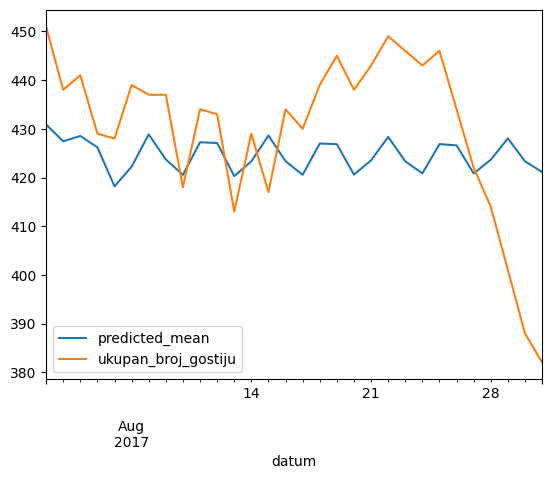

In [77]:
pred.plot(legend=True)

test['ukupan_broj_gostiju'].plot(legend = True)

In [82]:
#racunanje greske modela
#rmse = root mean squared error
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred,test['ukupan_broj_gostiju']))
print(f"RMSE: {rmse}%")

#mape = mean apsolute percentage error 
import numpy as np
mape = np.mean(np.abs((test['ukupan_broj_gostiju'] - pred) / test['ukupan_broj_gostiju'])) * 100
print(f"MAPE: {mape}%")

RMSE: 16.75853733910615%
MAPE: 3.333669973960541%


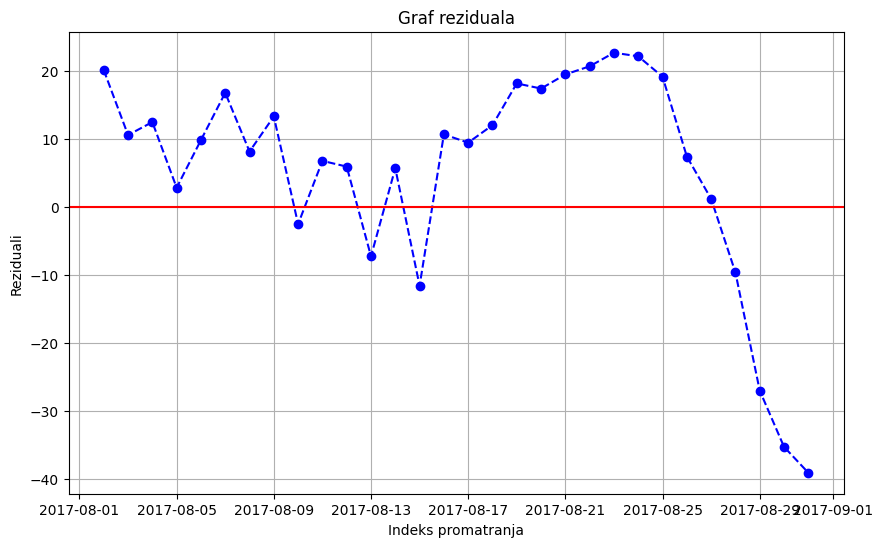

In [83]:
#racunanje residuala
reziduali = test['ukupan_broj_gostiju'] - pred

# Vizualizacija reziduala
plt.figure(figsize=(10, 6))  # Postavljanje veličine figure
plt.plot(reziduali, marker='o', linestyle='--', color='blue')  # Crtanje grafa reziduala
plt.title('Graf reziduala')
plt.xlabel('Indeks promatranja')
plt.ylabel('Reziduali')
plt.axhline(y=0, color='red', linestyle='-')  # Crta horizontalnu liniju na y=0 za referencu
plt.grid(True)
plt.show()